<a href="https://colab.research.google.com/github/daeunknown/deeplearning-2022-summer/blob/main/5_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

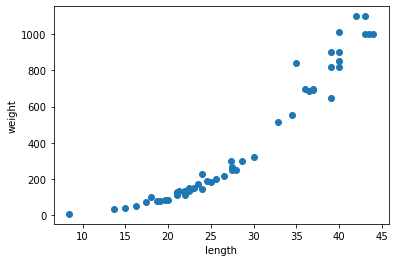

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# k-nn

In [ ]:
#훈련셋과 테스트셋 나누기
#random_state : 씨드 고정

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
#사이킷런에 사용할 입력 데이터는 2차원 배열 구조를 사용

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

#결정계수 확인   (cf. 분류의 경우, 정확도라 부름)
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)  #default는 5
knr.fit(train_input, train_target)

# 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))
#100cm인 농어의 무게를 예측
print(knr.predict([[100]]))

#주변 3개의 이웃만으로 예측하기 때문에 두 값이 동일하게 나온다

[1033.33333333]
[1033.33333333]


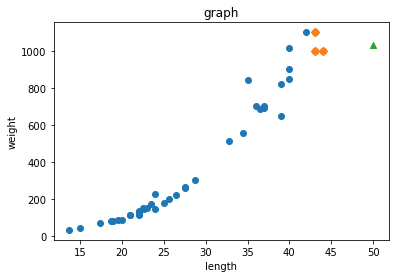

In [ ]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#훈련 셋의 산점도
plt.scatter(train_input, train_target)
#훈련 셋 중에서 이웃만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#50cm 농어의 데이터
plt.scatter(50, 1033, marker = '^')

plt.title('graph')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

# 50cm인 농어의 무게를 예측
print(lr.predict([[50]]))
#100cm인 농어의 무게를 예측
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


In [ ]:
#모델 파라미터 체크 (계수, 절편)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


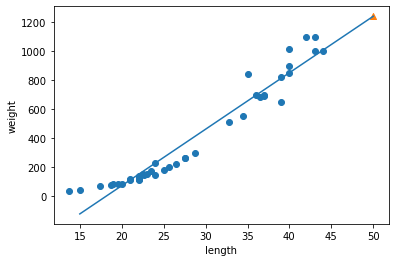

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#결정계수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559
